<a href="https://colab.research.google.com/github/Neelanjana000/Oasis_Infobyte_DS/blob/main/Car_Price_Prediction_(Task_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

Load and Explore the Dataset

In [ ]:
data = pd.read_csv("/content/car data.csv")

print("🔹 First five rows:")
print(data.head(), "\n")

print("🔹 Dataset Info:")
print(data.info(), "\n")

print("🔹 Missing Values:")
print(data.isnull().sum(), "\n")

print("🔹 Dataset Description:")
print(data.describe(), "\n")


🔹 First five rows:
  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0   

🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-

Data Preprocessing

In [ ]:
categorical_features = [col for col in data.columns if data[col].dtype == 'O']
print("🔹 Categorical Columns:", categorical_features, "\n")

le = LabelEncoder()
for col in categorical_features:
    data[col] = le.fit_transform(data[col])

print("✅ Encoded Data Sample:")
print(data.head(), "\n")


🔹 Categorical Columns: ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission'] 

✅ Encoded Data Sample:
   Car_Name  Year  Selling_Price  Present_Price  Driven_kms  Fuel_Type  \
0        90  2014           3.35           5.59       27000          2   
1        93  2013           4.75           9.54       43000          1   
2        68  2017           7.25           9.85        6900          2   
3        96  2011           2.85           4.15        5200          2   
4        92  2014           4.60           6.87       42450          1   

   Selling_type  Transmission  Owner  
0             0             1      0  
1             0             1      0  
2             0             1      0  
3             0             1      0  
4             0             1      0   



Feature Selection

In [ ]:
X = data.drop(columns=['Selling_Price'])
y = data['Selling_Price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training Samples: {X_train.shape[0]}, Testing Samples: {X_test.shape[0]}")


Training Samples: 240, Testing Samples: 61


Train the Model

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

 Model Evaluation

In [ ]:
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"✅ R² Score: {r2:.3f}")
print(f"✅ Mean Absolute Error: {mae:.3f}")


✅ R² Score: 0.966
✅ Mean Absolute Error: 0.589


Visualization

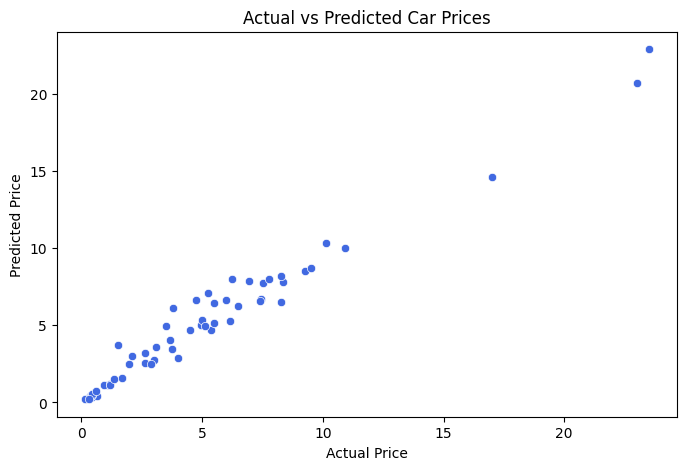

In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test, y=y_pred, color='royalblue')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.show()

Feature Importance

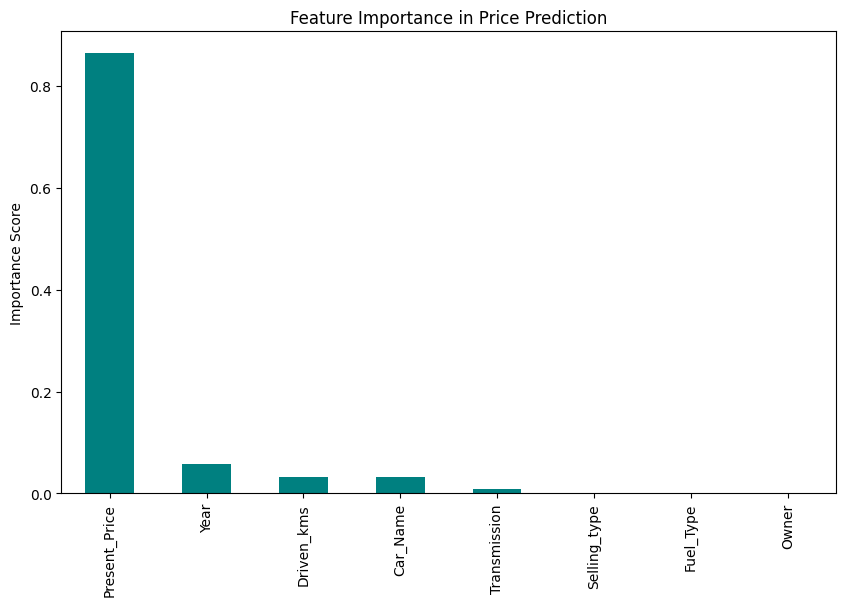

In [ ]:
importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
importances.sort_values(ascending=False).plot(kind='bar', color='teal')
plt.title("Feature Importance in Price Prediction")
plt.ylabel("Importance Score")
plt.show()

Predict a New Car's Price

In [ ]:
sample = pd.DataFrame([X.iloc[0]], columns=X.columns)
predicted_price = model.predict(sample)
print(f"\n🚘 Predicted Price for Sample Car: ₹{predicted_price[0]:.2f}")



🚘 Predicted Price for Sample Car: ₹3.89
